In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

## 垂直駆動アームの角度追従制御

In [2]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
m  = 0.5                 # アームの質量[kg]
c  = 1.5e-2              # 粘性摩擦係数[kg*m^2/s]
J  = 1.0e-2              # 慣性モーメント[kg*m^2]

P = tf( [0,1], [J, c, m*g*l] )

ref = 30 # 目標角度 [deg]

### P制御

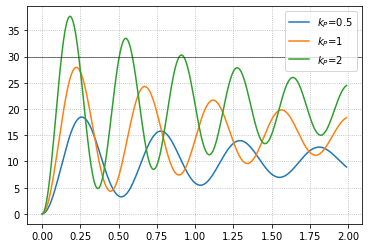

In [3]:
fig, ax = plt.subplots()

kp = (0.5, 1, 2)
for i in range(3):
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    y,t = step(Gyr, np.arange(0, 2, 0.01))
    
    ax.plot(t, y*ref, label = '$k_P$='+str(kp[i]))

ax.axhline(ref, color="k", linewidth=0.5)
ax.legend()
ax.grid(ls=':')

#fig.savefig("pcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

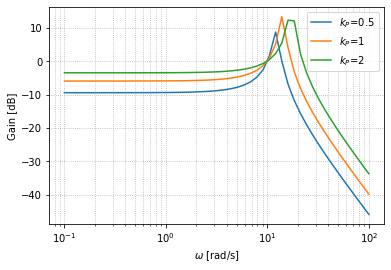

In [4]:
fig, ax = plt.subplots() 

for i in range(len(kp)):
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    gain, phase, w = bode(Gyr, logspace(-1,2), Plot=False)
    
    pltargs = {'label': '$k_P$='+str(kp[i])}
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
    
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
ax.legend()
ax.grid(which="both", ls=':')
        
#fig.savefig("pcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PD制御

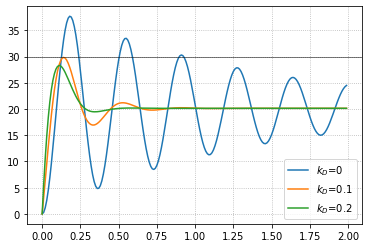

In [5]:
kp = 2
kd = (0, 0.1, 0.2)

fig, ax = plt.subplots()

for i in range(len(kd)):
    K = tf([kd[i], kp], [0, 1])
    Gyr = feedback(P*K, 1)
    y,t = step(Gyr,np.arange(0, 2, 0.01))
    
    pltargs = {'label': '$k_D$='+str(kd[i])}    
    ax.plot(t, y*ref, **pltargs)

ax.axhline(ref, color="k", linewidth=0.5)
ax.legend()
ax.grid(ls=':')

#fig.savefig("pdcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

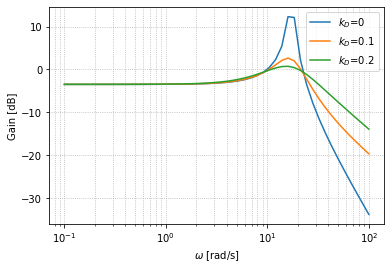

In [6]:
fig, ax = plt.subplots() 

for i in range(len(kd)):
    K = tf([kd[i], kp], [0,1])
    Gyr = feedback(P*K, 1)
    gain, phase, w = bode(Gyr, logspace(-1,2), dB=True, Plot=False)
    
    pltargs = {'label': '$k_D$='+str(kd[i])} 
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
        
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
ax.legend()
ax.grid(which="both", ls=':')

#fig.savefig("pdcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PID制御

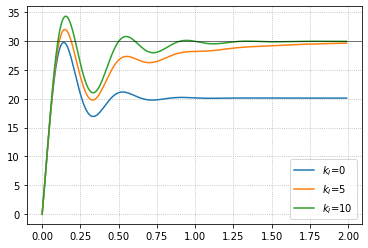

In [7]:
kp = 2
kd = 0.1
ki = (0, 5, 10)

fig, ax = plt.subplots()

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyr = feedback(P*K, 1)
    y, t = step(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'label': '$k_I$='+str(ki[i])}    
    ax.plot(t, y*ref, **pltargs)

ax.axhline(ref, color="k", linewidth=0.5) 
ax.legend()
ax.grid(ls=':')

#fig.savefig("pidcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

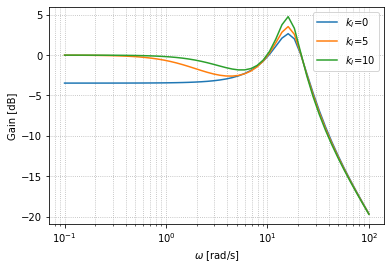

In [8]:
fig, ax = plt.subplots() 

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyr = feedback(P*K,1)
    gain, phase, w = bode(Gyr, logspace(-1,2), Plot=False)
    
    pltargs = {'label': '$k_I$='+str(ki[i])} 
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
        

ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
ax.legend()
ax.grid(which="both", ls=':')

#fig.savefig("pidcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 外乱抑制

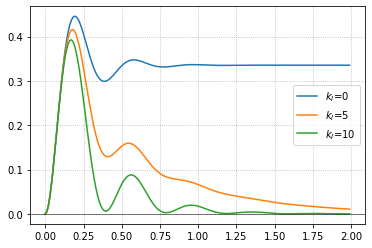

In [9]:
fig, ax = plt.subplots()

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyd = feedback(P, K)
    y, t = step(Gyd, np.arange(0, 2, 0.01))
    
    pltargs = {'label': '$k_I$='+str(ki[i])}    
    ax.plot(t, y, **pltargs)

ax.axhline(0, color="k", linewidth=0.5) 
ax.legend()
ax.grid(ls=':')

#fig.savefig("pidcont_dis.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

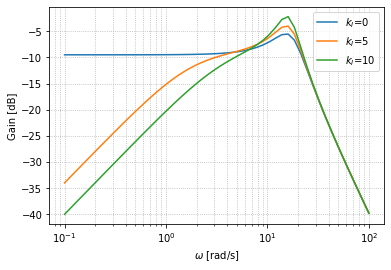

In [10]:
fig, ax = plt.subplots()  

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1,0])
    Gyd = feedback(P, K)
    gain, phase, w = bode(Gyd, logspace(-1,2), Plot=False)
    
    pltargs = {'label': '$k_I$='+str(ki[i])} 
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
        
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
ax.legend()
ax.grid(which="both", ls=':')

#fig.savefig("pidcont_dis_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## モデルマッチング

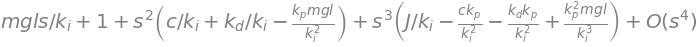

In [11]:
import sympy as sp
s = sp.Symbol('s')
kp, kd, ki = sp.symbols('k_p k_d k_i')
mgl, c, J = sp.symbols('mgl c J')
sp.init_printing()

G = (kp*s+ki)/(J*s**3 +(c+kd)*s**2 + (mgl + kp)*s + ki)
sp.series(1/G, s, 0, 4)

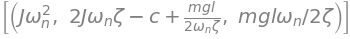

In [12]:
import sympy as sp
z, wn = sp.symbols('zeta omega_n')
kp, kd, ki = sp.symbols('k_p k_d k_i')
mgl,c,J = sp.symbols('mgl c J')
sp.init_printing()

f1 = mgl/ki-2*z/wn
f2 = (c+kd)/ki-mgl*kp/(ki**2)-1/(wn**2)
f3 = J/ki-kp*(c+kd)/(ki**2)+mgl*kp**2/(ki**3)
sp.solve([f1, f2, f3],[kp, kd, ki])

kP= 0.25
kI= 3.46888260254597
kD= 0.19445530410183876


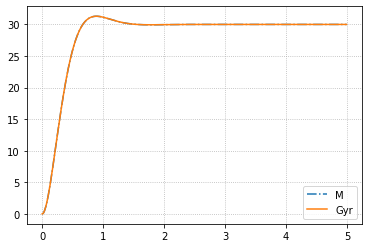

In [13]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
m  = 0.5                 # アームの質量[kg]
c  = 1.5e-2              # 粘性摩擦係数[kg*m^2/s]
J  = 1.0e-2              # 慣性モーメント[kg*m^2]

omega_n = 5
zeta = 0.707

Msys = tf([0,omega_n**2], [1,2*zeta*omega_n,omega_n**2])

kp = omega_n**2*J
ki = omega_n*m*g*l/(2*zeta)
kd = 2*zeta*omega_n*J + m*g*l/(2*zeta*omega_n) - c

print('kP=', kp)
print('kI=', ki)
print('kD=', kd)

Gyr = tf([kp,ki], [J, c+kd, m*g*l+kp, ki])

yM, tM = step(Msys, np.arange(0, 5, 0.01))
y, t = step(Gyr, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()

ax.plot(tM, yM*ref, label='M', ls = '-.')
ax.plot(t, y*ref, label='Gyr')

ax.legend()
ax.grid(ls=':')